<a href="https://colab.research.google.com/github/Jatinblitz7/Hackathon_iitg/blob/Master/Hackathon_J.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [2]:
# Data given

X = pd.read_csv('/content/training_set_features.csv')
Y = pd.read_csv('/content/training_set_labels.csv')
X.set_index('respondent_id', inplace = True)
Y.set_index('respondent_id', inplace = True)

In [3]:
# Labelling certain columns

labels = { "age_group": {"18 - 34 Years": 0,"35 - 44 Years": 1, "45 - 54 Years": 2, "55 - 64 Years": 3, "65+ Years": 4},
           "income_poverty": {"<= $75,000, Above Poverty": 1, "> $75,000": 2, "Below Poverty": 0},
           "census_msa": {"MSA, Principle City": 2, "MSA, Not Principle  City": 1, "Non-MSA": 0},
           "employment_status": {"Employed":2, "Not in Labor Force": 1, "Unemployed": 0},
           "race": {"White": 3, "Black":2, "Hispanic": 1, "Other or Multiple": 0},
           "sex": {"Female": 0, "Male": 1},}

X = X.replace(labels)

In [4]:
# Getting rid of useless data
X.drop(columns = ["employment_industry", "employment_occupation", "marital_status",	'behavioral_outside_home', "education",	'behavioral_avoidance', 'behavioral_large_gatherings',	'behavioral_touch_face', "rent_or_own", "hhs_geo_region"], inplace = True)

In [5]:
# Sorting out the columns
Ordinal = ['xyz_concern', 'xyz_knowledge', 'opinion_xyz_vacc_effective', 'opinion_xyz_risk', 'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc']

Binary = ['behavioral_antiviral_meds',	'behavioral_face_mask',	'behavioral_wash_hands', "health_insurance", 'doctor_recc_xyz', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'sex']

Categorical = ['age_group', 'income_poverty', 'census_msa', 'employment_status', 'race', 'household_adults', 'household_children']

In [6]:
#Filling the NaN values
imputer = SimpleImputer(strategy='most_frequent')

X[Categorical] = imputer.fit_transform(X[Categorical])
X[Binary] = imputer.fit_transform(X[Binary])
X[Ordinal] = imputer.fit_transform(X[Ordinal])

In [9]:
X.head()

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_face_mask,behavioral_wash_hands,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,...,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,race,sex,income_poverty,employment_status,census_msa,household_adults,household_children
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,3.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0
1,3.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.0,4.0,1.0,3.0,1.0,0.0,2.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,2.0,0.0,3.0,1.0,1.0,2.0,1.0,2.0,0.0
3,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,4.0,1.0,4.0,3.0,0.0,0.0,1.0,2.0,0.0,0.0
4,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,4.0,2.0,3.0,0.0,1.0,2.0,1.0,1.0,0.0


In [10]:
# Splitting the Output into xyz and seas

Y_xyz = Y.loc[:,'xyz_vaccine']
Y_seas = Y.loc[:,'seasonal_vaccine']
Y_xyz = Y_xyz.to_numpy()
Y_seas = Y_seas.to_numpy()

# Splitting the dataset
X_train, X_test, Y_train_xyz, Y_test_xyz, Y_train_seas, Y_test_seas = train_test_split(X, Y_xyz, Y_seas, test_size = 0.25, random_state = 42)

In [11]:
# Applying Logistic Regression

model = LogisticRegression(max_iter = 2500)

# Applying model on xyz
model.fit(X_train, Y_train_xyz)
Y_pred_xyz = model.predict(X_test)
print(accuracy_score(Y_test_xyz, Y_pred_xyz))

# Applying model on seas
model.fit(X_train, Y_train_seas)
Y_pred_seas = model.predict(X_test)
print(accuracy_score(Y_test_seas, Y_pred_seas))

0.8403474614347761
0.7829863711247567


In [12]:
# Applying Gradient Booster

model2 = GradientBoostingClassifier()
model2.fit(X_train,Y_train_xyz)
y_pred1 = model2.predict(X_test)
print(accuracy_score(Y_test_xyz, y_pred1))
model2.fit(X_train,Y_train_seas)
y_pred2 = model2.predict(X_test)
print(accuracy_score(Y_test_seas, y_pred2))

0.8427437471918526
0.7891268533772653


In [13]:
# Applying SVC

model1 = SVC()
model1.fit(X_train,Y_train_xyz)
Y_pred_xyz1 = model1.predict(X_test)
print(accuracy_score(Y_test_xyz, Y_pred_xyz1))
model1.fit(X_train, Y_train_seas)
Y_pred_seas1 = model1.predict(X_test)
print(accuracy_score(Y_test_seas, Y_pred_seas1))

0.8395986221356897
0.7871798711996405


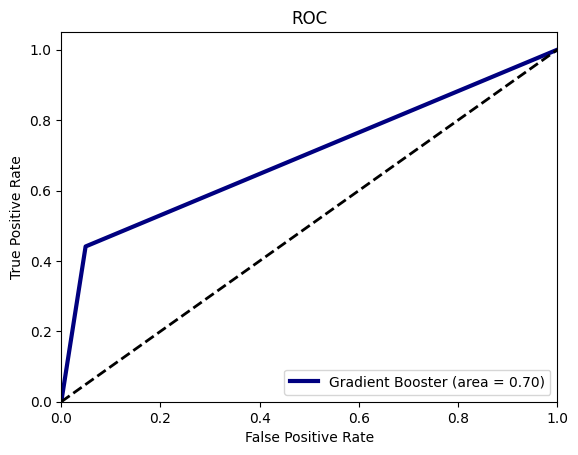

AUC = 0.70


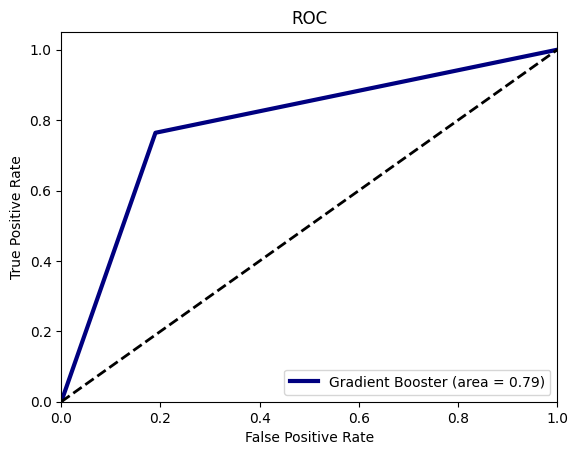

AUC: 0.79


In [14]:
# Checking the ROC and AOC for Gradient Booster

# For xyz vaccine
fpr, tpr, thresholds = roc_curve(Y_test_xyz, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='navy', lw=3, label=f'Gradient Booster (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc='lower right')
plt.show()
print(f'AUC = {roc_auc:.2f}')

# For seasonal vaccine
fpr, tpr, thresholds = roc_curve(Y_test_seas, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='navy', lw=3, label=f'Gradient Booster (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc='lower right')
plt.show()
print(f'AUC: {roc_auc:.2f}')

In [15]:
# Loading the Test Set

x_test = pd.read_csv('/content/test_set_features.csv')
id = x_test['respondent_id']
x_test.set_index('respondent_id', inplace = True)

In [16]:
# Getting rid of unnecessary data

x_test.drop(columns = ["employment_industry", "employment_occupation", "marital_status",	'behavioral_outside_home', "education",	'behavioral_avoidance', 'behavioral_large_gatherings',	'behavioral_touch_face', "rent_or_own", "hhs_geo_region"], inplace = True)

In [17]:
# Labelling certain columns

x_test = x_test.replace(labels)

In [18]:
# Filling the NaN values

imputer = SimpleImputer(strategy='most_frequent')

x_test[Categorical] = imputer.fit_transform(x_test[Categorical])
x_test[Binary] = imputer.fit_transform(x_test[Binary])
x_test[Ordinal] = imputer.fit_transform(x_test[Ordinal])

In [19]:
# Splitting the Output into xyz and seas

Y_xyz = Y.loc[:,'xyz_vaccine']
Y_seas = Y.loc[:,'seasonal_vaccine']
Y_xyz = Y_xyz.to_numpy()
Y_seas = Y_seas.to_numpy()

In [20]:
# Making the predictions

model2 = GradientBoostingClassifier()
model2.fit(X,Y_xyz)
y_pred_xyz = model2.predict_proba(x_test)
model2.fit(X,Y_seas)
y_pred_seas = model2.predict_proba(x_test)

y_pred_xyz = y_pred_xyz[:,1]
y_pred_seas = y_pred_seas[:,1]
print(y_pred_xyz)
print(y_pred_seas)

[0.10275313 0.04255963 0.45649165 ... 0.1138515  0.05009526 0.48251156]
[0.19985392 0.04952786 0.79921969 ... 0.20598212 0.38051249 0.60396492]


In [21]:
# Preparing the final Dataframe

Series = {'respondent_id': id, 'xyz_vaccine': y_pred_xyz, 'seasonal_vaccine': y_pred_seas}
Vaccine = pd.DataFrame(Series)
Vaccine
Vaccine.to_csv('Predictions_Hackathon.csv', index = False)